In [1]:
import numpy as np
import random as Random
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.read_excel(r"E:\My work\Sem 7\ML\ML-Class\End Sem\End sem Data.xlsx")
scaler = StandardScaler()
data = scaler.fit_transform(df)

In [11]:
np.random.shuffle(data)
Y = data[:,-1]
X = np.delete(data,-1,1)
X = X.astype(np.float64)
Y = Y.astype(np.float64)
#Separating into train/test (80-20)
sep = 0.8*len(X)-1
sep = int(sep)
trainx, testx = X[:sep,:], X[sep:,:]
trainy, testy = Y[:sep], Y[sep:]

In [16]:
# GD from scratch
def GD_Batch(x,y, epochs = 10**4, α = 0.001):
    w0 = np.ones((len(x),1))
    x = np.hstack((w0,x))
    wc = np.array([0]*len(x[0]))
    n = len(x)
    for epoch in range(epochs):
        yp = np.dot(x,wc)

        #Reshaping y to allow for multiplication
        yp = yp.reshape(len(yp),1)
        y = y.reshape(len(y),1)
        ws = (x*(y-yp)).sum(axis=0)
        wd = -(2/n)*ws
        wc = wc-(α*wd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc)

#SGD only works for 5 feature vector data
def SGD(x,y, iter = 10**4, α = 0.001):
    y = y.tolist()
    wc1 = wc2 = wc3 = wc4 = wc5 = bc = 0
    n = len(x)
    for i in range(iter):
        ya = np.random.choice(y)
        xa1 = x[:,0]
        xa1 = xa1[y.index(ya)]
        xa2 = x[:,1]
        xa2 = xa2[y.index(ya)]
        xa3 = x[:,2]
        xa3 = xa3[y.index(ya)]
        xa4 = x[:,3]
        xa4 = xa4[y.index(ya)]
        xa5 = x[:,4]
        xa5 = xa5[y.index(ya)]

        yp = (wc1*xa1)+(wc2*xa2)+(wc3*xa3)+(wc4*xa4)+(wc5*xa5)+bc

        wd1 = -2*xa1*(ya-yp)
        wd2 = -2*xa2*(ya-yp)
        wd3 = -2*xa3*(ya-yp)
        wd4 = -2*xa4*(ya-yp)
        wd5 = -2*xa5*(ya-yp)
        bd = -2*(ya-yp)
        wc1 = wc1-(α*wd1)
        wc2 = wc2-(α*wd2)
        wc3 = wc3-(α*wd3)
        wc4 = wc4-(α*wd4)
        wc5 = wc5-(α*wd5)
        bc = bc-(α*bd)
    wc = [bc,wc1,wc2,wc3,wc4,wc5]
    return(wc)
    
    
    
# Mini Batch GD (mini batch size 20) only works for 5 feature vector data
def minBatchGD(x,y,iter = 10**4,α = 0.001,bs = 3):
    y = y.tolist()
    wc1 = wc2 = wc3 = wc4 = wc5 = bc = 0
    n = len(x)
    for i in range(iter):
        ya = Random.sample(y,k = bs)
        xa1 = np.zeros(bs)
        xa2 = np.zeros(bs)
        xa3 = np.zeros(bs)
        xa4 = np.zeros(bs)
        xa5 = np.zeros(bs)

        xas1 = x[:,0]
        xas2 = x[:,1]
        xas3 = x[:,2]
        xas4 = x[:,3]
        xas5 = x[:,4]
        for i in range(bs):
            xa1[i] = xas1[y.index(ya[i])]
            xa2[i] = xas2[y.index(ya[i])]
            xa3[i] = xas3[y.index(ya[i])]
            xa4[i] = xas4[y.index(ya[i])]
            xa5[i] = xas5[y.index(ya[i])]
            
        yp = (wc1*xa1)+(wc2*xa2)+(wc3*xa3)+(wc4*xa4)+(wc5*xa5)+bc

        wd1 = -(2/bs)*sum(xa1*(ya-yp))
        wd2 = -(2/bs)*sum(xa2*(ya-yp))
        wd3 = -(2/bs)*sum(xa3*(ya-yp))
        wd4 = -(2/bs)*sum(xa4*(ya-yp))
        wd5 = -(2/bs)*sum(xa5*(ya-yp))
        bd = -(2/bs)*sum(ya-yp)

        wc1 = wc1-(α*wd1)
        wc2 = wc2-(α*wd2)
        wc3 = wc3-(α*wd3)
        wc4 = wc4-(α*wd4)
        wc5 = wc5-(α*wd5)
        bc = bc-(α*bd)
    
    wc = [bc,wc1,wc2,wc3,wc4,wc5]
    return(wc)

# Predicts the values based on weights
def predict(x,w):
    x0 = np.ones((len(x),1))
    x = np.hstack((x0,x))
    pred = np.dot(x,w)
    return(pred)


In [17]:
# Applying linear regression
model = LinearRegression()
res = model.fit(trainx, trainy)


predy = res.predict(testx)
w1 = GD_Batch(trainx,trainy)
w2 = SGD(trainx,trainy)
w3 = minBatchGD(trainx,trainy)

predy1 = predict(testx,w1)
predy2 = predict(testx,w2)
predy3 = predict(testx,w3)

In [19]:
# The coefficients
print("Coefficients: \n", model.intercept_, model.coef_)
print(w1)
print(w2)
print(w3)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(testy, predy))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(testy, predy))
print("Coefficient of determination: %.2f" % r2_score(testy, predy1))
print("Coefficient of determination: %.2f" % r2_score(testy, predy2))
print("Coefficient of determination: %.2f" % r2_score(testy, predy3))

Coefficients: 
 -0.019843531228976443 [-0.57582308 -0.36905998 -0.47529145  0.21849146 -0.27046711]
[-0.01982657 -0.57495193 -0.36240374 -0.47248849  0.21785954 -0.27551604]
[-0.022577956266997802, -0.5353730034239415, -0.3861464840635574, -0.4779672943399556, 0.17506548028635613, -0.2635284544660683]
[-0.03436686107969655, -0.5748946206054236, -0.35865886593139845, -0.457450299998578, 0.19777023079523484, -0.27176434993112286]
Mean squared error: 0.45
Coefficient of determination: 0.53
Coefficient of determination: 0.53
Coefficient of determination: 0.52
Coefficient of determination: 0.53


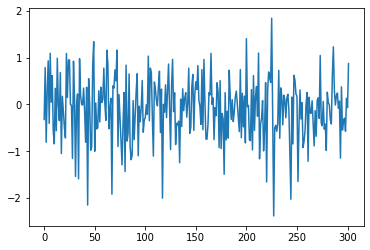

In [20]:
acc = predy-testy
l = len(predy)
plt.plot(np.arange(l), acc)
plt.show()